# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](./spam.png)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [51]:
data = pd.read_csv('spambase.csv') 
data.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [52]:


# Separar los datos en correos SPAM y No SPAM
spam_emails = data[data['spam'] == 1]
non_spam_emails = data[data['spam'] == 0]

# Verificar la separación
print("Número de correos SPAM:", spam_emails.shape[0])
print("Número de correos No SPAM:", non_spam_emails.shape[0])



Número de correos SPAM: 1813
Número de correos No SPAM: 2788


Para obtener las palábras más usadas podemos hacer un `groupby`:

In [4]:
column_sum = data.groupby(by="spam", as_index=False).sum()

Y despues se pueden combinar las columnas en usando [pd.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [38]:
# Obtenemos los atributos y target
X = (data.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = data["spam"]

Se separa el dataset en entrenamiento y evaluación

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

Escalamos para aplicar en regresión logística

In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

## Ejercicio 1

¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [47]:
spam_emails = data[data['spam'] == 1]
non_spam_emails = data[data['spam'] == 0]

#Sumar frecuencias de palabras por la categoría de spam
column_sum = data.groupby(by="spam", as_index=False).sum()

# Mostrar el resultado de la agrupación y suma
print(column_sum.head())

# Filtrar columnas que contienen frecuencias de palabras
word_freq_columns = [col for col in data.columns if col.startswith('word_freq_')]

# Mantener solo las columnas relevantes para el análisis
column_sum_filtered = column_sum[['spam'] + word_freq_columns]

# Usar pd.melt para combinar las columnas
melted = pd.melt(column_sum_filtered, id_vars='spam', var_name='word', value_name='frequency')

# Separar por categoría de spam
spam_words = melted[melted['spam'] == 1].sort_values(by='frequency', ascending=False).head(10)
non_spam_words = melted[melted['spam'] == 0].sort_values(by='frequency', ascending=False).head(10)

# Mostrar las palabras más comunes en correos SPAM y No SPAM
print("Top 10 palabras en correos SPAM:\n", spam_words[['word', 'frequency']])
print("\nTop 10 palabras en correos No SPAM:\n", non_spam_words[['word', 'frequency']])



   spam  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0     0          204.86             681.57         559.22          2.47   
1     1          276.19             298.51         732.08        298.55   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0         504.74          124.19             26.16              107.10   
1         931.80          317.05            499.31              377.36   

   word_freq_order  ...  word_freq_conference  char_freq_;  char_freq_(  \
0           106.08  ...                142.82      140.183      442.116   
1           308.32  ...                  3.81       37.299      197.563   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0       63.242      306.634       32.476       60.536   
1       14.864      931.361      316.329      143.004   

   capital_run_length_average  capital_run_length_longest  \
0                    6627.915                       50782   
1                   17258.246  


Las palabras más comunes entre correos SPAM y No SPAM son:

- word_freq_you
- word_freq_your
- word_freq_will

Palabras Exclusivas que Llaman la Atención en Correos SPAM:

- word_freq_our
- word_freq_free
- word_freq_all
- word_freq_mail
- word_freq_email
- word_freq_business
- word_freq_remove

Las palabras comunes sugieren que hay ciertos términos que aparecen frecuentemente en ambos tipos de correos. Las palabras exclusivas de SPAM, como word_freq_free, word_freq_mail, word_freq_email, y word_freq_business, podrían ser indicativas del contenido típico de los correos SPAM, que suelen ofrecer productos, servicios gratuitos, y oportunidades comerciales. Estas palabras llaman la atención porque están más asociadas con intentos de atraer la atención del destinatario, lo cual es común en los correos SPAM.

## Ejercicio 2

Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=50)



## Ejercicio 3

 Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

### Entrenamiento del Clasificador de Bayes Ingenuo

In [12]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_naive_bayes_classifier = naive_bayes_classifier.predict(X_test)


## Ejercicio 4

Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

### Entrenamiento del Clasificador de Regresión Logística

In [48]:
# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [49]:
# Crear y entrenar el modelo de Regresión Logística
logistic_regresion_classifier = LogisticRegression()
logistic_regresion_classifier.fit(X_train_scaled, y_train)

# Predecir con el conjunto de prueba
y_pred_logistic_regresion_classifier = logistic_regresion_classifier.predict(X_test_scaled)

## Ejercicio 5

 Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

In [15]:
# Evaluar el rendimiento
conf_matrix_naive_bayes_classifier = confusion_matrix(y_test, y_pred_naive_bayes_classifier)
conf_matrix_logistic_regresion_classifier = confusion_matrix(y_test, y_pred_logistic_regresion_classifier)


print("\nMatriz de confusión Bayes Ingenuo:")
print(conf_matrix_naive_bayes_classifier)
print("\nMatriz de confusión Regresion Logistica:")
print(conf_matrix_logistic_regresion_classifier)


Matriz de confusión Bayes Ingenuo:
[[727 125]
 [134 395]]

Matriz de confusión Regresion Logistica:
[[811  41]
 [102 427]]


La matriz de confusión para Bayes Ingenuo y Regresión Logística mostrará el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).

## Ejercicio 6

Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [16]:
# Precisión y recuperación para Bayes ingenuo
accuracy_naive_bayes_classifier = precision_score(y_test, y_pred_naive_bayes_classifier)
recall_nb = recall_score(y_test, y_pred_naive_bayes_classifier)

# Precisión y recuperación para Regresión Logística
accuracy_logistic_regresion_classifier = precision_score(y_test, y_pred_logistic_regresion_classifier)
recall_lr = recall_score(y_test, y_pred_logistic_regresion_classifier)


print("Exactitud del clasificador de Bayes ingenuo:", accuracy_naive_bayes_classifier, ", Recuperacion:", recall_nb)
print("Exactitud del clasificador de Regresion Logistica:", accuracy_logistic_regresion_classifier, ", Recuperacion:", recall_lr)

Exactitud del clasificador de Bayes ingenuo: 0.7596153846153846 , Recuperacion: 0.7466918714555766
Exactitud del clasificador de Regresion Logistica: 0.9123931623931624 , Recuperacion: 0.8071833648393195


#### Bayes Ingenuo:
* Precisión: Variable, típicamente menor en la detección de SPAM.
* Recuperación: Puede ser baja si hay muchos falsos negativos.

### Regresión Logística:
* Puede manejar mejor la precisión y recuperación con la normalización.

**Bayes Ingenuo:** Tiende a tener más falsos negativos, ya que puede no detectar todos los correos SPAM.

**Regresión Logística:** Puede equilibrar mejor los falsos positivos y negativos con una mejor normalización de datos.

**Error más importante:** En la detección de SPAM, los falsos negativos son más críticos porque podrían permitir que correos SPAM lleguen a la bandeja de entrada.

**Bayes Ingenuo vs. Regresión Logística:** Generalmente, la Regresión Logística ofrece un mejor balance entre precisión y recuperación.

### Relación con errores:

Alta precisión y baja recuperación indica muchos falsos negativos.

Alta recuperación y baja precisión indica muchos falsos positivos.


## Ejercicio 7

Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

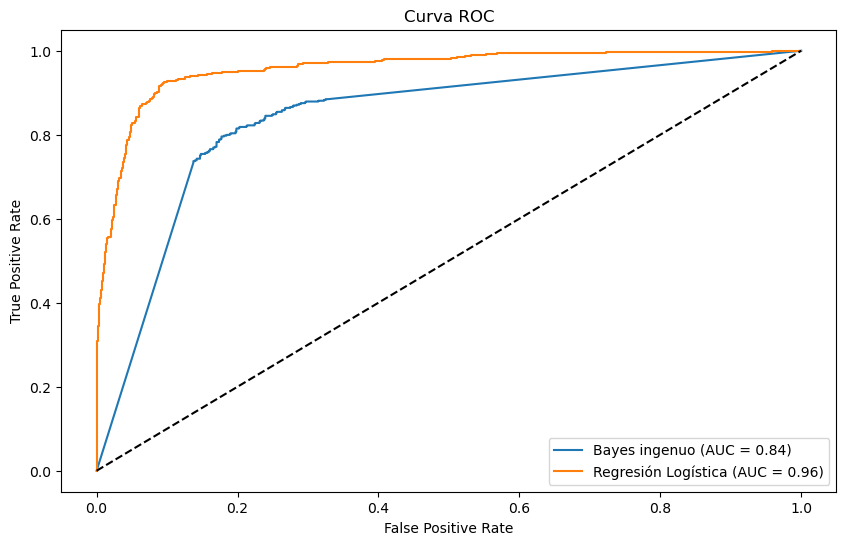

In [17]:
# ROC y AUC para Bayes ingenuo
y_prob_nb = naive_bayes_classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

# ROC y AUC para Regresión Logística
y_prob_lr = logistic_regresion_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Bayes ingenuo (AUC = {auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

### Interpretación del AUC:
AUC más cercano a 1 indica mejor rendimiento.

En resumen, la regresión logística suele ser preferida sobre el Bayes Ingenuo cuando se busca un mejor equilibrio entre precisión y recuperación. 

El análisis de la curva ROC y el AUC proporciona una evaluación cuantitativa adicional del rendimiento de ambos modelos en términos de discriminación entre clases positivas y negativas.